In [1]:
import pandas as pd
import numpy as np
from Higgs.tools.ImplementationUtils import implementChannelLimit, fromHB5Table1, readHEPDataCsv
from Higgs import bounds as HB
from Higgs.tools.LimitValidation import validateChannelLimit
from itertools import product
from Higgs import predictions as HP
from Higgs import Predictions
import itertools
import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.getcwd())))
import MassResolutions as resolution


# 13TeV LHC

## ATLAS 13TeV `H>VV` combinations [1808.02380](https://arxiv.org/abs/1808.02380)

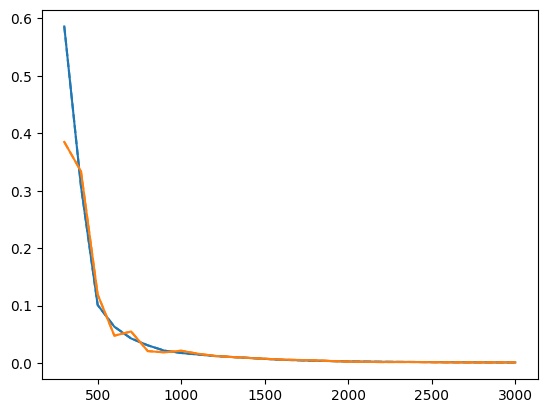

Looks good. Saving this to VVcomb_H_LHC13_ATLAS_36.json


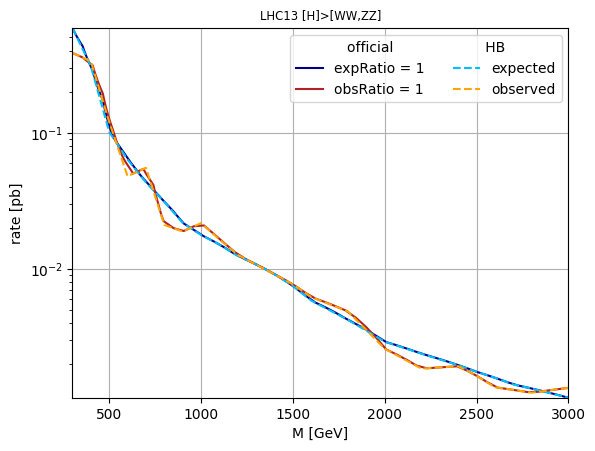

In [2]:
df = fromHB5Table1("23801_Atlas_gg-phi-VV_36.1fb-1_13TeV", "ATLAS")
df.exp *= 1e-3
df.obs *= 1e-3
limitFile = implementChannelLimit(
    1685420,
    {"channels": [["H", "ZZ"], ["H", "WW"]]},
    "Fig. 5a",
    df,
    prefix="VVcomb_H",
    idSuffix=1,
    massResolution=resolution.ZZ["4l"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## ATLAS 13TeV `vbfH>VV` combinations [1808.02380](https://arxiv.org/abs/1808.02380)

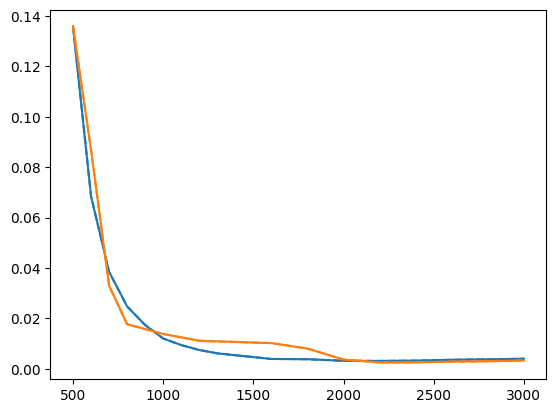

Looks good. Saving this to VVcomb_vbfH_LHC13_ATLAS_36.json


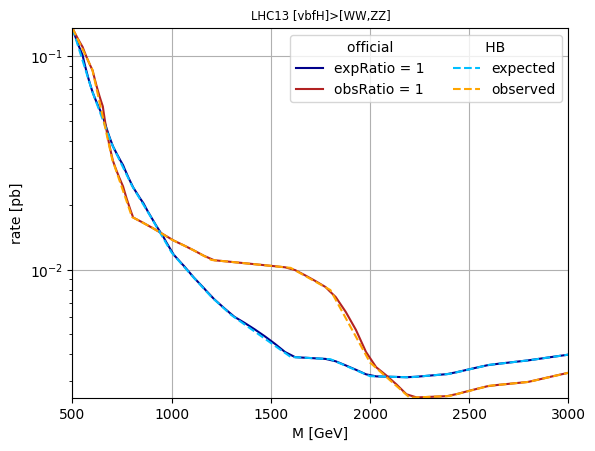

In [3]:
df = fromHB5Table1("23802_Atlas_vbf-phi-VV_36.1fb-1_13TeV", "ATLAS")
df.exp *= 1e-3
df.obs *= 1e-3
limitFile = implementChannelLimit(
    1685420,
    {"channels": [["vbfH", "ZZ"], ["vbfH", "WW"]]},
    "Fig. 5b",
    df,
    prefix="VVcomb_vbfH",
    idSuffix=2,
    massResolution=resolution.ZZ["4l"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## ATLAS 13TeV `H>VV` combinations [2004.14636](https://arxiv.org/abs/2004.14636)

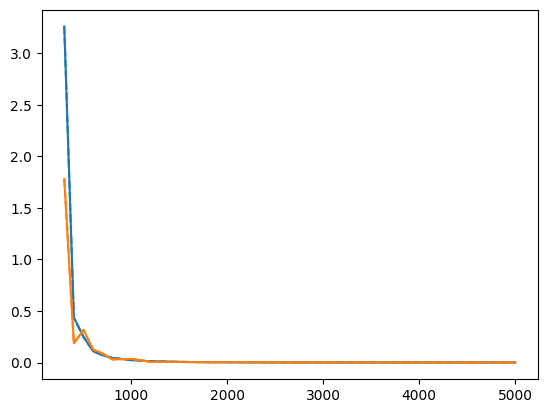

Looks good. Saving this to VVcomb_H_LHC13_ATLAS_139.json


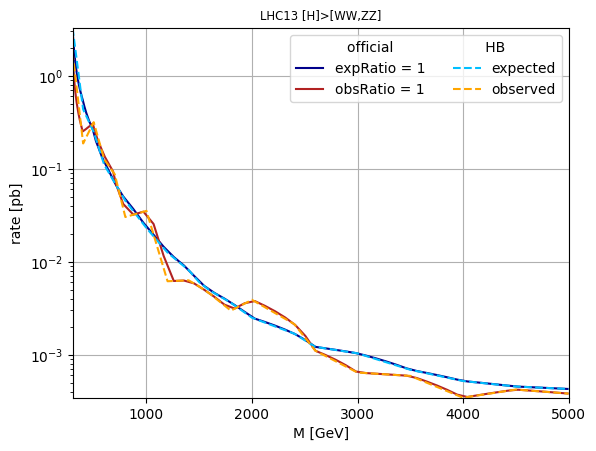

In [4]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1793572/Table%208/1/csv"
)
df = dfs[0].rename(
    columns={"Mass [TeV]": "m", "Cross section upper limit at 95% CL [pb]": "obs"}
)
df["exp"] = dfs[1]["Cross section upper limit at 95% CL [pb]"]
df.m *= 1e3  # TeV to GeV
limitFile = implementChannelLimit(
    "2004.14636",
    {"channels": [["H", "ZZ"], ["H", "WW"]]},
    "https://doi.org/10.17182/hepdata.93922.v1/t8",
    df,
    prefix="VVcomb_H",
    idSuffix=1,
    massResolution=resolution.ZZ["4l"],
    luminosity=139,
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## ATLAS 13TeV `vbfH>VV` combinations [2004.14636](https://arxiv.org/abs/2004.14636)

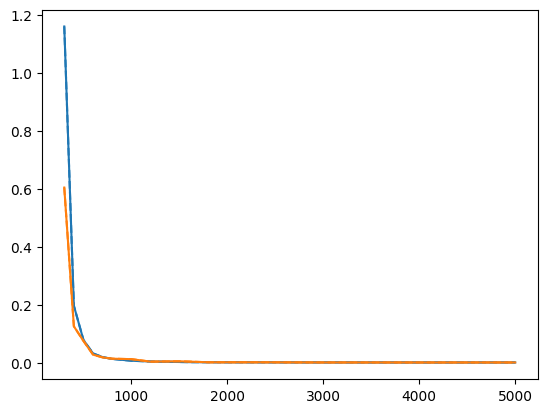

Looks good. Saving this to VVcomb_vbfH_LHC13_ATLAS_139.json


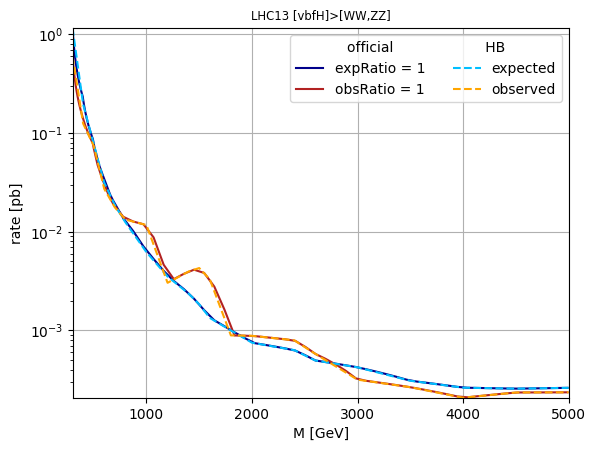

In [5]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1793572/Table%209/1/csv"
)
df = dfs[0].rename(
    columns={"Mass [TeV]": "m", "Cross section upper limit at 95% CL [pb]": "obs"}
)
df["exp"] = dfs[1]["Cross section upper limit at 95% CL [pb]"]
df.m *= 1e3  # TeV to GeV
limitFile = implementChannelLimit(
    "2004.14636",
    {"channels": [["vbfH", "ZZ"], ["vbfH", "WW"]]},
    "https://doi.org/10.17182/hepdata.93922.v1/t9",
    df,
    prefix="VVcomb_vbfH",
    idSuffix=2,
    massResolution=resolution.ZZ["4l"],
    luminosity=139,
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


# 8 TeV LHC

## CMS Run1 SM-Higgs combination [CMS-PAS-HIG-12-045](https://cds.cern.ch/record/1494149)
This combination only exists as a conf note.

No arxiv eprint found.
Multiple different luminosity values: [5.1, 12.2] using 5.1 unless you set it manually


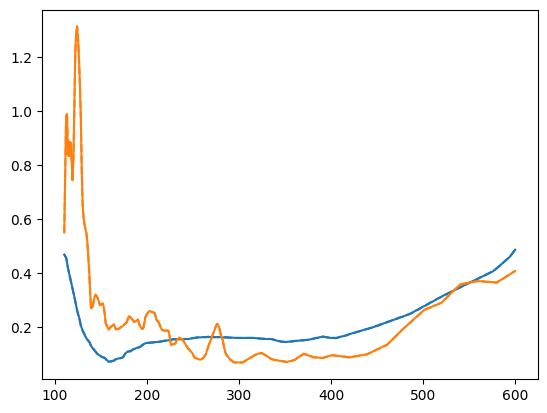

Looks good. Saving this to comb_LHC8_CMS_17.json
using effective coupling input for SM-normalized limit


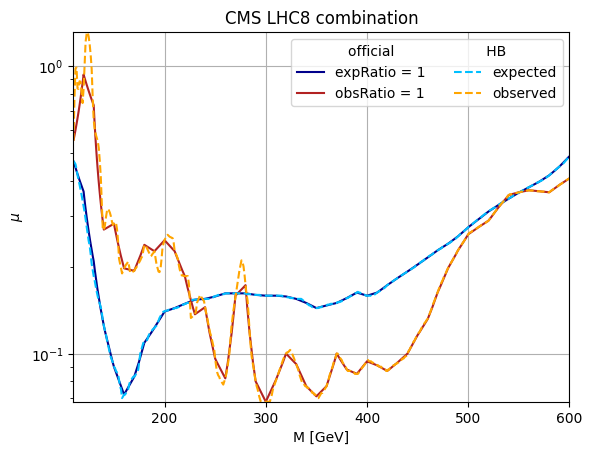

In [6]:
df = fromHB5Table1("12045_CMS_SMcombined_17.3fb-1", "CMS")

prod = ["H", "vbfH", "HZ", "HW", "Htt"]
dec = ["ZZ", "WW", "gamgam", "tautau", "bb"]
limitFile = implementChannelLimit(
    1230268,
    {"channels": [[p, d] for d, p in product(dec, prod)]},
    "Fig. 4 (left)",
    df,
    constraints={"modelLike": "SMHiggsInterp", "process": "signal"},
    luminosity=5.1 + 12.2,
    normalization={"reference": "SMHiggsInterp", "process": "signal"},
    collider="LHC8",
    massResolution = resolution.ZZ["4l"] # this is the best involved resolution
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)
ax.set_yscale("log")
ax.set_title("CMS LHC8 combination");


## ATLAS SM-Higgs discovery combination [1207.7214](https://arxiv.org/abs/1207.7214)

Multiple different luminosity values: [5.8, 4.8] using 5.8 unless you set it manually


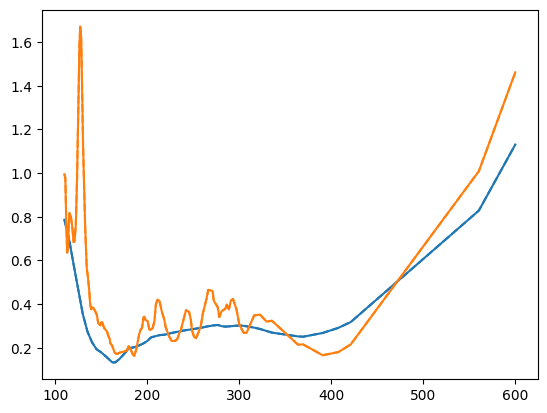

Looks good. Saving this to comb_LHC8_ATLAS_11.json
using effective coupling input for SM-normalized limit


Text(0.5, 1.0, 'ATLAS Higgs discovery combination')

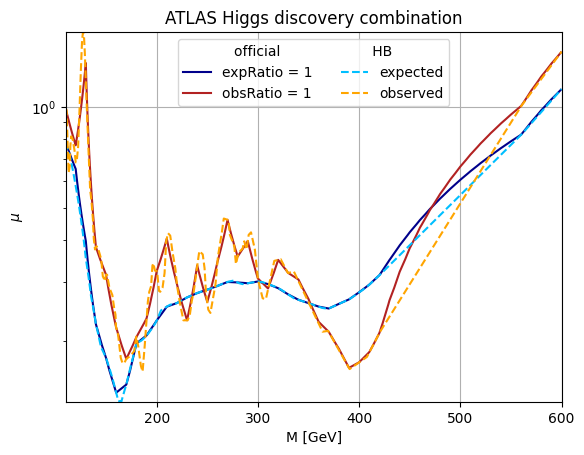

In [7]:
df = fromHB5Table1("7214_Atlas_SMcombined_10.5fb-1", "ATLAS")

prod = ["H", "vbfH", "HZ", "HW", "Htt"]
dec = ["ZZ", "WW", "gamgam", "tautau", "bb"]
limitFile = implementChannelLimit(
    "1207.7214",
    {"channels": [[p, d] for d, p in product(dec, prod)]},
    "Fig. 7 (top)",
    df,
    constraints={"modelLike": "SMHiggsInterp", "process": "signal"},
    luminosity=4.8 + 5.8,
    normalization={"reference": "SMHiggsInterp", "process": "signal"},
    massResolution=resolution.ZZ["4l"],  # this is the best involved resolution
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)
ax.set_yscale("log")
ax.set_title("ATLAS Higgs discovery combination")


## CMS `H>VV` combination full Run 1 [1504.00936](https://arxiv.org/abs/1504.00936)

Multiple different luminosity values: [5.1, 19.7] using 5.1 unless you set it manually


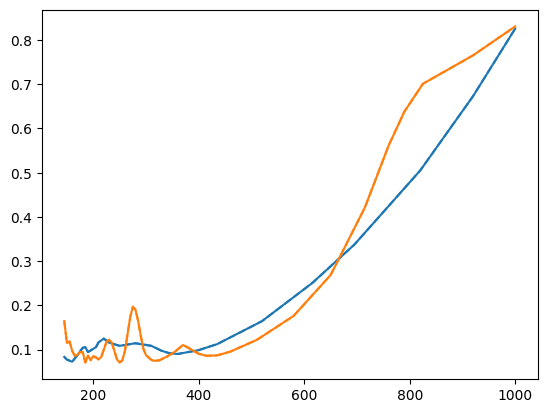

Looks good. Saving this to VVcomb_LHC8_CMS_25.json
using effective coupling input for SM-normalized limit


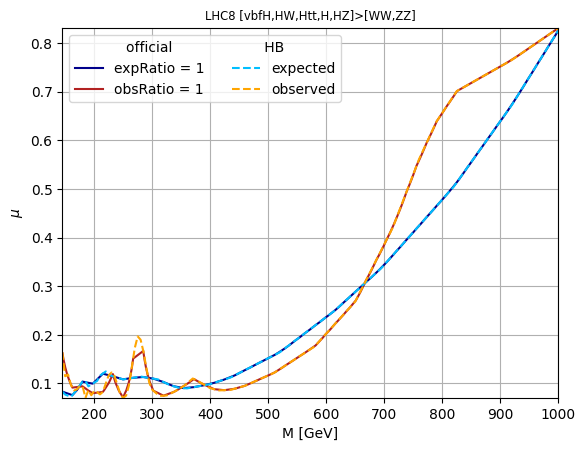

In [8]:
df = fromHB5Table1("009361_CMS_H-VV_5.1fb-1_19.7fb-1", "CMS")
prod = ["H", "vbfH", "HZ", "HW", "Htt"]
dec = ["ZZ", "WW"]
limitFile = implementChannelLimit(
    "1504.00936",
    {"channels": [[p, d] for d, p in product(dec, prod)]},
    "Fig. 7 (left)",
    df,
    constraints={"modelLike": "SMHiggsInterp", "process": "signal"},
    luminosity=5.1 + 19.7,
    normalization={"reference": "SMHiggsInterp", "process": "signal"},
    prefix="VVcomb",
    massResolution=resolution.ZZ["4l"],  # this is the best involved resolution
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)
